In [28]:
# Import packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import warnings
import seaborn as sb

warnings.filterwarnings("ignore")
df=pd.read_csv("clean_data.csv")
df

,Unnamed: 0,age,sex,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
0,0,60.0,0.0,64,24.3,1,0,72,0,0,13112.6
1,1,49.0,1.0,75,22.6,1,0,78,1,1,9567.0
2,2,32.0,1.0,64,17.8,2,1,88,1,1,32734.2
3,3,61.0,1.0,53,36.4,1,1,72,1,0,48517.6
4,4,19.0,1.0,50,20.6,0,0,82,1,0,1731.7
...,...,...,...,...,...,...,...,...,...,...,...
13643,14995,39.0,0.0,49,28.3,1,1,54,1,0,21082.2
13644,14996,39.0,0.0,74,29.6,4,0,64,1,0,7512.3
13645,14997,20.0,0.0,62,33.3,0,0,52,1,0,1391.5
13646,14998,52.0,0.0,88,36.7,0,0,70,1,0,9144.6


In [29]:
#provides a summary of the data frame 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13648 entries, 0 to 13647
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        13648 non-null  int64  
 1   age               13648 non-null  float64
 2   sex               13648 non-null  float64
 3   weight            13648 non-null  int64  
 4   bmi               13648 non-null  float64
 5   no_of_dependents  13648 non-null  int64  
 6   smoker            13648 non-null  int64  
 7   bloodpressure     13648 non-null  int64  
 8   diabetes          13648 non-null  int64  
 9   regular_ex        13648 non-null  int64  
 10  claim             13648 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 1.1 MB


In [30]:
#provides a statistical summary 
df.describe()


,Unnamed: 0,age,sex,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,13648.000000,13648.000000,13648.000000,13648.000000,13648.000000,13648.000000,13648.000000,13648.000000,13648.000000,13648.000000,13648.000000
mean,7502.759525,39.586533,0.512896,64.689478,30.287295,1.106462,0.198124,68.628737,0.783118,0.223110,13416.465050
std,4330.045760,14.040870,0.499852,13.655520,6.133622,1.209568,0.398601,19.443669,0.412136,0.416347,12080.022325
min,0.000000,18.000000,0.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,3761.750000,27.000000,0.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4889.000000
50%,7521.500000,40.000000,1.000000,63.000000,29.400000,1.000000,0.000000,72.000000,1.000000,0.000000,9715.800000
75%,11256.250000,52.000000,1.000000,75.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16450.900000
max,14999.000000,64.000000,1.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


In [31]:
#calculates and displays the count of missing (null) values

df.isnull().sum()


Unnamed: 0          0
age                 0
sex                 0
weight              0
bmi                 0
no_of_dependents    0
smoker              0
bloodpressure       0
diabetes            0
regular_ex          0
claim               0
dtype: int64

<Axes: >

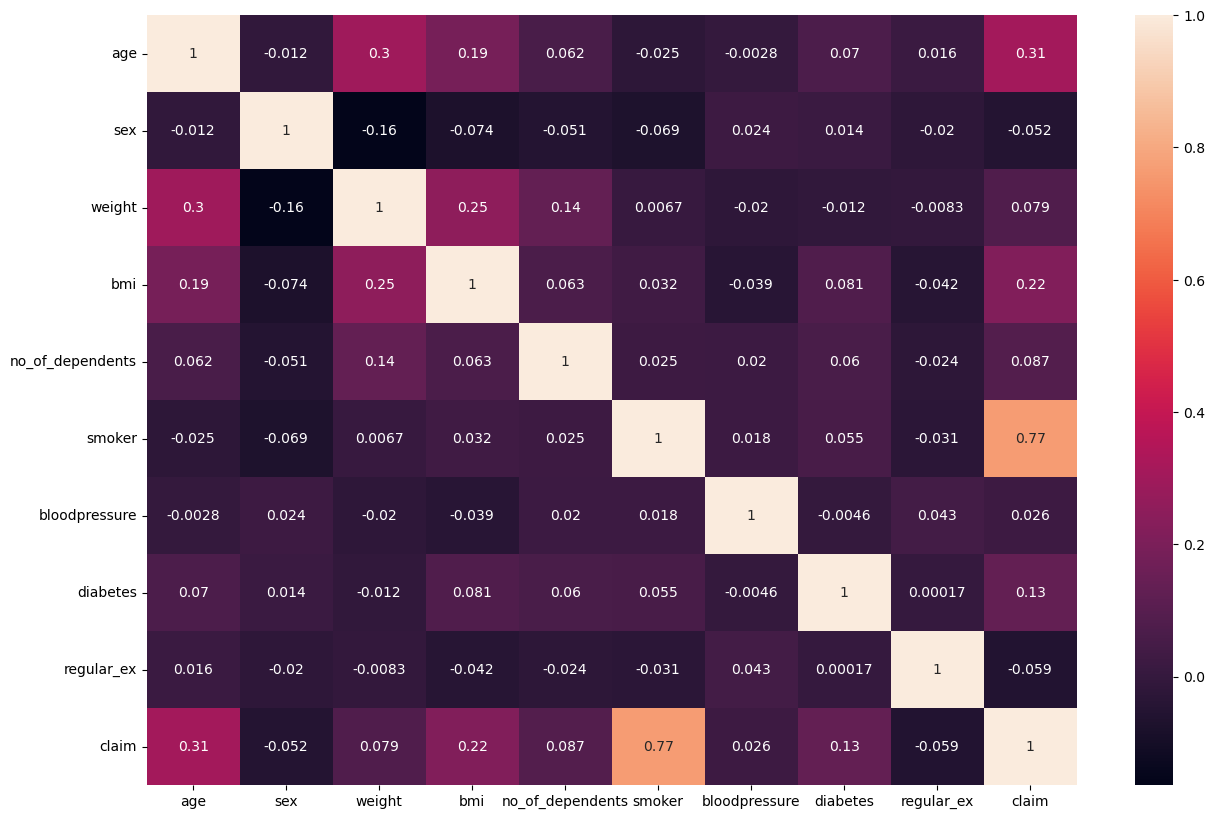

In [32]:
#this code creates a heatmap using Seaborn to visualize the correlation between the specified columns 


plt.figure(figsize=(15,10))
columns =['age','sex','weight','bmi','no_of_dependents','smoker','bloodpressure','diabetes','regular_ex','claim']
sns.heatmap(df[columns].corr(),annot=True)

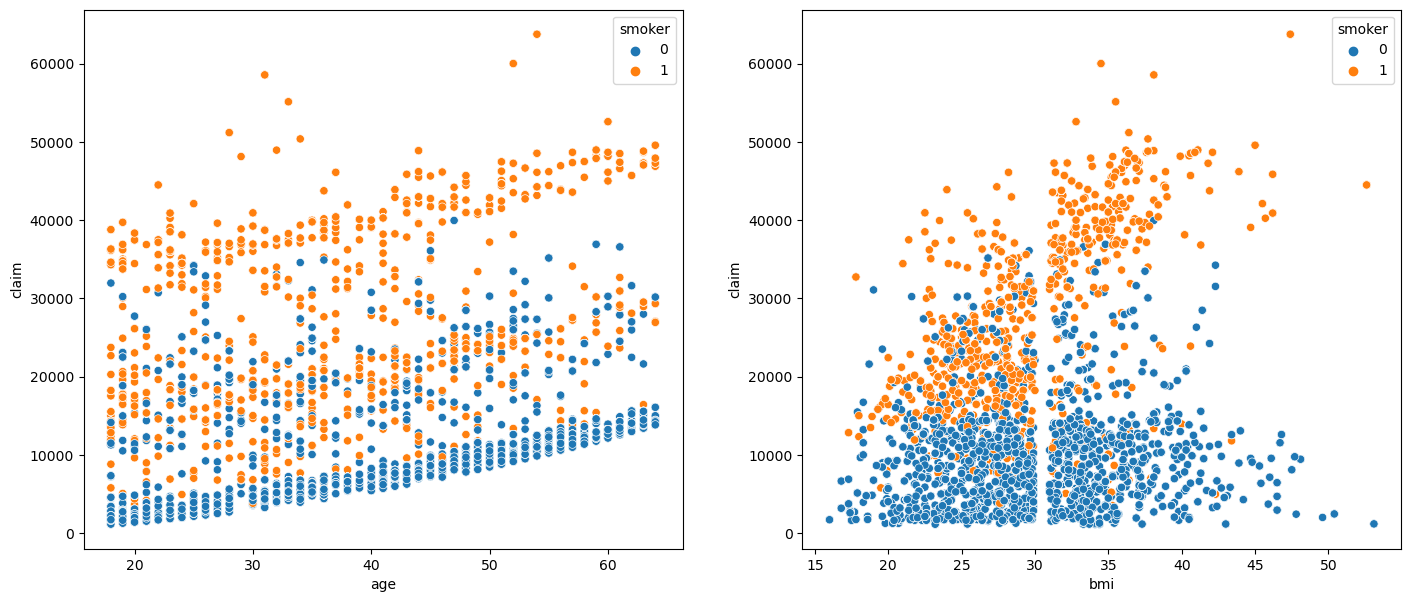

In [33]:
 #This code creates a subplot with two scatter plots, visualizing the relationship between the 'age' and 'bmi' features and the 'claim' variable


features = ['age', 'bmi']
 
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sb.scatterplot(data=df, x=col,
                   y='claim',
                   hue='smoker')
plt.show()

In [34]:
#the performance of a Linear Regression model using various evaluation metrics and different random data splits. 


X=df.drop(['claim'],axis=1)
Y=df[['claim']]
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
    print
    lrmodel=LinearRegression()
    lrmodel.fit(xtrain,ytrain)
    l1.append(lrmodel.score(xtrain,ytrain))
    l2.append(lrmodel.score(xtest,ytest))
    cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
    l3.append(cvs)
df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
df1


,train acc,test acc,cvs
0,0.720780,0.715616,0.719303
1,0.718180,0.725670,0.719303
2,0.715251,0.737954,0.719303
3,0.719202,0.722245,0.719303
4,0.721967,0.711502,0.719303
5,0.724474,0.701154,0.719303
6,0.724744,0.698622,0.719303
7,0.715973,0.735030,0.719303
8,0.722535,0.708586,0.719303
9,0.724773,0.699249,0.719303


In [35]:

#Linear Regression model evaluates its performance on the training and testing sets using R-squared scores, and also calculates the mean R-squared score through cross-validation

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,X,Y,cv=5,).mean())



0.7152506889742342
0.7379538104148888
0.7193025413925056
